In [1]:
import re
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing, model_selection

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Data loading

In [107]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X=mnist.train.images
#X = np.vstack((X_train, X_test))

y=mnist.train.labels
#y = np.vstack((y_train, y_test))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.995, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_test, y_test, test_size=0.99, random_state=42, stratify=y_test)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [111]:
y_val.shape

(547, 10)

In [112]:
y_train.shape

(275, 10)

In [113]:
X_test.shape

(54178, 784)

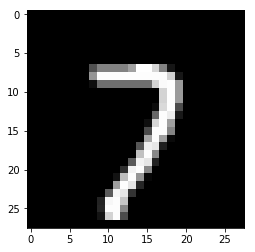

In [114]:
plt.imshow(X_train[4].reshape(28, 28), plt.cm.gray)

In [115]:
_, train_counts = np.unique(np.argmax(y_train,1), return_counts=True)
train_max = np.argmax(train_counts)
print(train_counts)
print(train_max)
train_counts.shape

[27 31 27 28 27 25 27 29 27 27]
1


(10,)

In [116]:
baseline_acc = np.mean(np.argmax(y_test,1) == train_max)
baseline_acc

0.1123518771457049

# Optimal Encoding

In [117]:
from RNN import RNN
from networks import MLP
from OptimalEncodingExp import OptimalEncoding

## Classification

In [138]:
n_in = X_train.shape[-1]
k = 100
n_out = y_train.shape[-1]

sigma=1


encode_widths=[100,100,100]

decode_widths = [100,100,100]


In [139]:
X_train.shape

(275, 784)

In [140]:
encoder = MLP(n_in, k,encode_widths)
decoder = MLP(k, n_out, decode_widths)

In [141]:
oe = OptimalEncoding(encoder, decoder, k, activation = None,fname='../OEresults/mnist/',live=True)

100%|██████████| 10000/10000 [28:14<00:00,  6.55it/s] 


Final task loss: nan


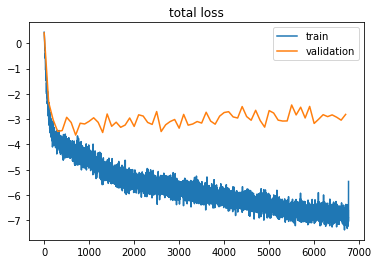

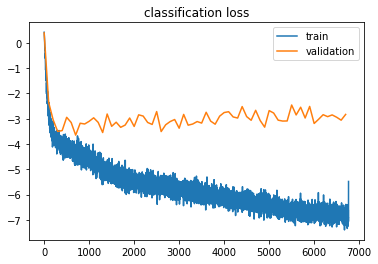

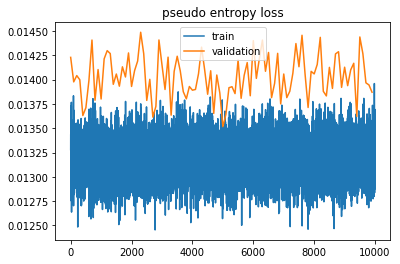

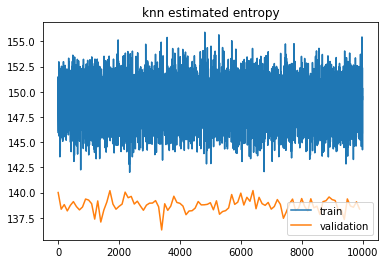

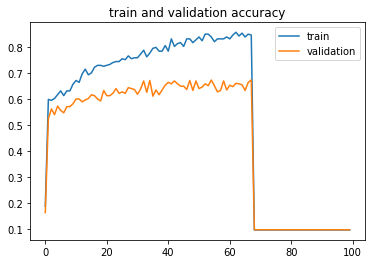

In [142]:
oe.train(X_train, X_val,y_val, y=y_train, 
         min_entropy=True, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 10,
         epochs=10000, batch_size=100, lr=1e-3)

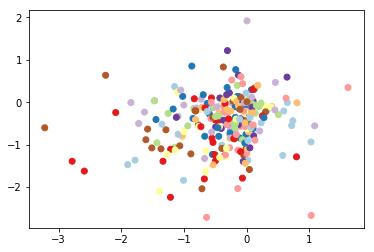

In [143]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [144]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

train acc = 0.098


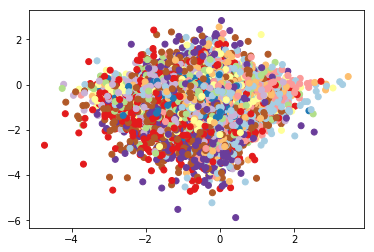

In [145]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [146]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

test acc = 0.099


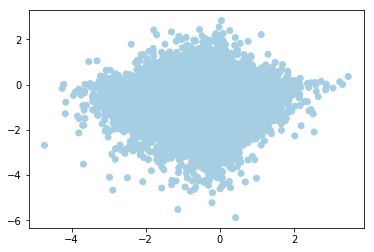

In [147]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))

(array([    0.,     0.,     0.,     0.,     0., 54178.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

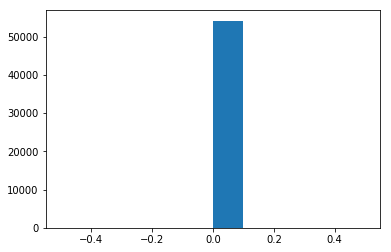

In [148]:
plt.hist(pred_test)

# SubOptimal Encoding

In [21]:
n_in = X_train.shape[-1]
k = 100
n_out = y_train.shape[-1]

sigma=1


encode_widths=[100,100,100]

decode_widths = [100,100,100]


In [22]:
encoder = MLP(n_in, k,encode_widths)
decoder = MLP(k, n_out, decode_widths)

In [23]:
oe = OptimalEncoding(encoder, decoder, k, activation = None,fname='../OEresults/mnist/',live=True)

100%|██████████| 2000/2000 [00:51<00:00, 39.09it/s]


Final task loss: -0.179841


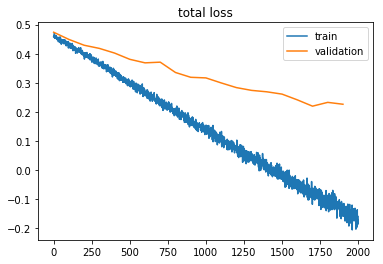

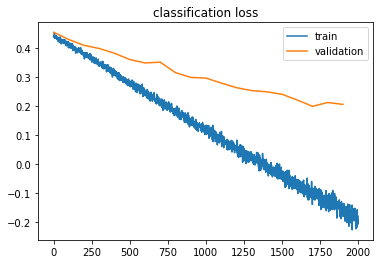

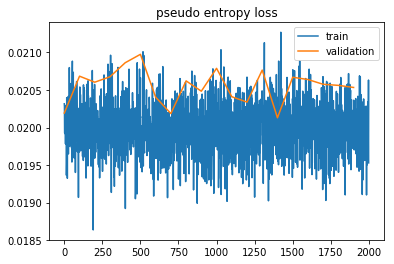

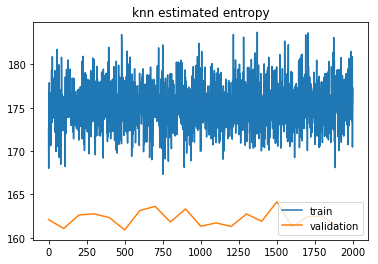

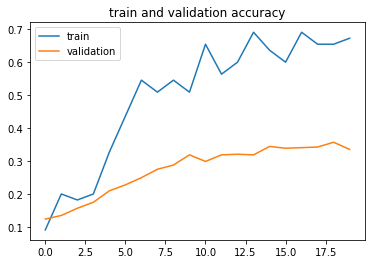

In [24]:
oe.train(X_train, X_val,y_val, y=y_train, 
         min_entropy=False, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 10,
         epochs=2000, batch_size=53, lr=1e-4)

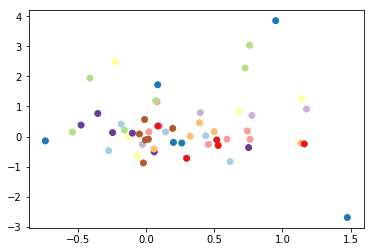

In [25]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [26]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

train acc = 0.636


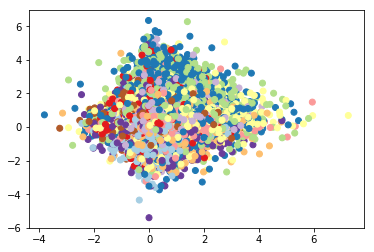

In [27]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [28]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

test acc = 0.369


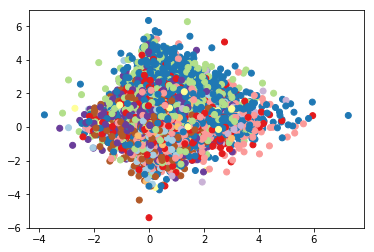

In [29]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))